In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corona_df_original = pd.read_csv('../data/Covid19_With_GDP_Values.csv')
corona_df_original

,Unnamed: 0,Country/Region,Date,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,0,Afghanistan,2021-01-01,0,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,1,Afghanistan,2022-01-01,0,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,2,Albania,2021-01-01,0,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,3,Albania,2022-01-01,0,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,4,Algeria,2021-01-01,0,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
...,...,...,...,...,...,...,...,...,...,...
335,335,West Bank and Gaza,2022-01-01,0,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,336,Zambia,2021-01-01,0,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,337,Zambia,2022-01-01,0,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,338,Zimbabwe,2021-01-01,0,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


In [3]:
corona_df = corona_df_original.copy()
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      340 non-null    int64  
 1   Country/Region  340 non-null    object 
 2   Date            340 non-null    object 
 3   Province/State  340 non-null    object 
 4   Confirmed       340 non-null    float64
 5   Deaths          340 non-null    float64
 6   Recovered       340 non-null    float64
 7   GDP             340 non-null    float64
 8   Unemployment    340 non-null    float64
 9   CPI             338 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 26.7+ KB


# Data Preparation

In [4]:
unique_values = corona_df.copy()
for col in corona_df.columns:
    unique_values[col] = pd.Series(corona_df[col].unique())
unique_values

,Unnamed: 0,Country/Region,Date,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,0,Afghanistan,2021-01-01,0,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,1,Albania,2022-01-01,Australian Capital TerritoryNew South WalesNor...,158107.0,7356.0,0.0,1.450216e+10,14.100,123.448662
2,2,Algeria,NaN,AlbertaBritish ColumbiaDiamond PrincessGrand P...,58316.0,1181.0,33634.0,1.793057e+10,12.473,131.750835
3,3,Andorra,NaN,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,210224.0,3217.0,67395.0,1.891638e+10,11.588,166.218895
4,4,Angola,NaN,Faroe IslandsGreenland,99897.0,2762.0,7463.0,1.862654e+11,13.607,181.619932
...,...,...,...,...,...,...,...,...,...,...
335,335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# I droped the unanmed column because it is a duplicated index and the province column because the values have no meaning for the model
# There is already another country column which i left there for now
corona_df = corona_df.drop(['Unnamed: 0','Province/State'],axis=1)
corona_df

,Country/Region,Date,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,Afghanistan,2021-01-01,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,Afghanistan,2022-01-01,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,Albania,2021-01-01,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,Albania,2022-01-01,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,Algeria,2021-01-01,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
...,...,...,...,...,...,...,...,...
335,West Bank and Gaza,2022-01-01,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,Zambia,2021-01-01,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,Zambia,2022-01-01,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,Zimbabwe,2021-01-01,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


In [6]:
corona_df.isna().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
GDP               0
Unemployment      0
CPI               2
dtype: int64

In [7]:
# I dont believe the cpi average is a good value for afganistan and may influence the model badly so i dropped the rows
corona_df = corona_df[corona_df['Country/Region']!='Afghanistan']
corona_df

,Country/Region,Date,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
2,Albania,2021-01-01,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,Albania,2022-01-01,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,Algeria,2021-01-01,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
5,Algeria,2022-01-01,218818.0,6284.0,0.0,2.255603e+11,12.437,181.619932
6,Andorra,2021-01-01,8117.0,84.0,7463.0,3.324683e+09,12.437,181.619932
...,...,...,...,...,...,...,...,...
335,West Bank and Gaza,2022-01-01,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,Zambia,2021-01-01,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,Zambia,2022-01-01,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,Zimbabwe,2021-01-01,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


In [8]:
corona_df.duplicated().unique()

array([False])

In [9]:
corona_df = corona_df.drop(['Date'],axis=1)
corona_df

,Country/Region,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
2,Albania,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,Albania,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,Algeria,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
5,Algeria,218818.0,6284.0,0.0,2.255603e+11,12.437,181.619932
6,Andorra,8117.0,84.0,7463.0,3.324683e+09,12.437,181.619932
...,...,...,...,...,...,...,...
335,West Bank and Gaza,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,Zambia,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,Zambia,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,Zimbabwe,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


In [10]:
agg = {'Confirmed':'sum','Deaths':'sum','Recovered':'sum','GDP':'sum','Unemployment':'mean','CPI':'mean'}
corona_df = corona_df.groupby('Country/Region').agg(agg).reset_index().drop('Country/Region',axis=1)
corona_df

,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,268540.0,4398.0,33634.0,3.684694e+10,12.0305,127.599748
1,318715.0,9046.0,67395.0,4.118257e+11,13.0220,173.919413
2,31857.0,224.0,7463.0,6.705285e+09,12.4370,181.619932
3,99966.0,2177.0,11146.0,1.709049e+11,15.2460,645.998608
4,4442.0,124.0,148.0,3.469100e+09,14.6930,123.019852
...,...,...,...,...,...,...
164,276212.0,2099.0,75244.0,1.507414e+11,4.9400,375.337755
165,8.0,1.0,1.0,1.972613e+09,4.9525,130.479616
166,608971.0,6337.0,118926.0,3.727450e+10,25.4050,115.185995
167,278945.0,4130.0,18773.0,5.126020e+10,5.5940,316.298821


# Data exploration

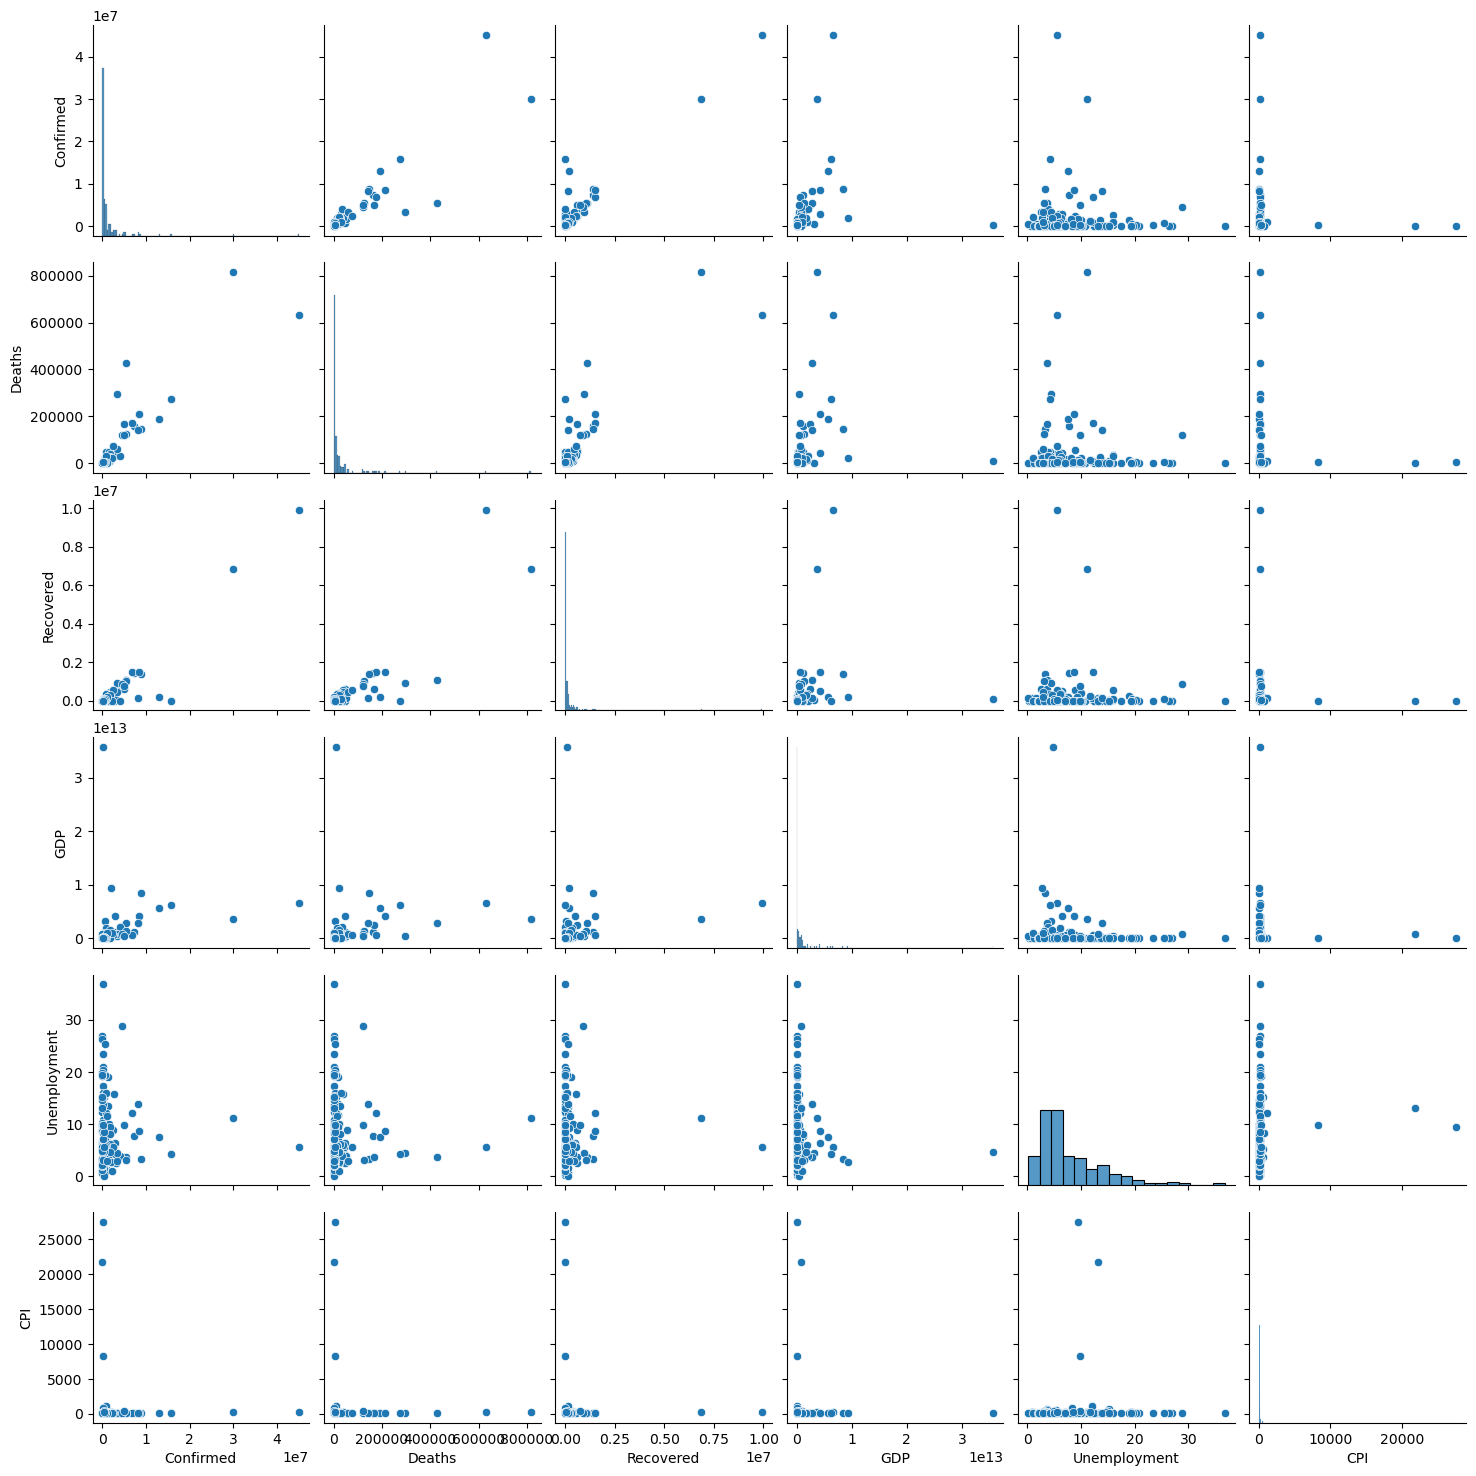

In [11]:
sns.pairplot(data=corona_df)
plt.show()

# There is a correlation between deaths and confirmed deaths, and also deaths and recovered deaths
# As the death count goes higher the higher the confirmed rate and recovered rate are
# These statistics show that in every country there wasn't much diffirence in the medicine so as the confirmed rate rises so does the deaths and recovered # rates
# How ever there is not so much data so I will leave the dataset as is
# There isnt correlation between the fetures and the gdp

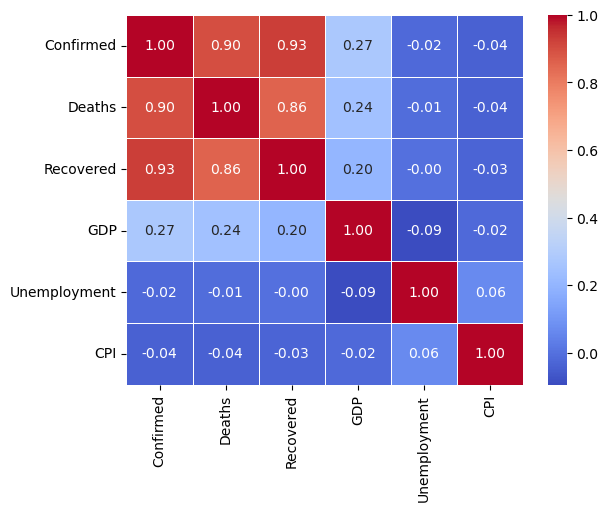

In [12]:
corr = corona_df.corr()
sns.heatmap(data=corr,cmap='coolwarm',annot=True,fmt='.2f',linewidths=0.5)
plt.show()

# Linear Regression model training

In [13]:
X = corona_df.drop(['GDP'],axis=1)
y = corona_df['GDP']
y

0      3.684694e+10
1      4.118257e+11
2      6.705285e+09
3      1.709049e+11
4      3.469100e+09
           ...     
164    1.507414e+11
165    1.972613e+09
166    3.727450e+10
167    5.126020e+10
168    5.573787e+10
Name: GDP, Length: 169, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression,RidgeCV, Ridge, LassoCV, Lasso
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
def split_data(X,y):
    return train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
def scale_data(X_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    return scaled_X_train,scaled_X_test

In [17]:
MAEs = []
MSEs = []
RMSEs = []
coefs = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

    linear_model = LinearRegression()
    linear_model.fit(scaled_X_train,y_train)
    linear_predictions = linear_model.predict(scaled_X_test)
    
    MAE = mean_absolute_error(y_test,linear_predictions)
    MSE = mean_squared_error(y_test,linear_predictions)
    RMSE = np.sqrt(MSE)
    MAEs.append(MAE)
    MSEs.append(MSE)
    RMSEs.append(RMSE)
    coefs.append(linear_model.coef_)
MAEs = pd.Series(MAEs)
MSEs = pd.Series(MSEs)
RMSEs = pd.Series(RMSEs)
coefs = pd.Series(coefs)
linear_metrics = {'MAE':[MAEs.mean()],'MSE':[MSEs.mean()],'RSME':[RMSEs.mean()]}
linear_metrics = pd.DataFrame(linear_metrics)
linear_metrics

,MAE,MSE,RSME
0,1.343111e+12,2.488036e+25,3.756578e+12


In [18]:
coefs.mean()

array([ 1.82737681e+12, -1.52819666e+09, -1.05884472e+12, -2.49369310e+11,
       -3.75676645e+10])

In [19]:
X_train,X_test,y_train,y_test = split_data(X,y)

scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

linear_model = LinearRegression()
linear_model.fit(scaled_X_train,y_train)

linear_predictions = linear_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test,linear_predictions)
MSE = mean_squared_error(y_test,linear_predictions)
RMSE = np.sqrt(MSE)

linear_metrics = {'MAE':[MAEs.mean()],'MSE':[MSEs.mean()],'RSME':[RMSEs.mean()]}
linear_metrics = pd.DataFrame(linear_metrics)
linear_metrics

,MAE,MSE,RSME
0,1.343111e+12,2.488036e+25,3.756578e+12


In [20]:
# Ridge with default alpha values
X_train,X_test,y_train,y_test = split_data(X,y)

scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

ridgeCV_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridgeCV_model.fit(scaled_X_train,y_train)
ridgeCV_model.alpha_

0.1

In [21]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(scaled_X_train,y_train)
ridge_predictions = ridge_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test,ridge_predictions)
MSE = mean_squared_error(y_test,ridge_predictions)
RSME = np.sqrt(MSE)

ridge_metrics = {'MAE':[MAE],'MSE':[MSE],'RSME':[RSME]}
ridge_metrics = pd.DataFrame(ridge_metrics)
ridge_metrics

,MAE,MSE,RSME
0,7.231127e+11,1.657307e+24,1.287364e+12


In [22]:
ridge_model.coef_,

(array([ 1.39860823e+12,  1.18789326e+10, -7.80125142e+11, -2.88335767e+11,
        -5.61178706e+10]),)

In [23]:
ridge_betas = pd.DataFrame(ridge_model.coef_,columns=['Betas'])
ridge_betas

,Betas
0,1.398608e+12
1,1.187893e+10
2,-7.801251e+11
3,-2.883358e+11
4,-5.611787e+10


In [24]:
# lasso eps must be between 0 and 1, beacuse it represents a fraction, n_alpahas on a logramithtic scale
X_train,X_test,y_train,y_test = split_data(X,y)

scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

best_model = {}

eps_values = [0.1,0.2,0.3,0.5,0.7]
for eps in eps_values:
    lassoCV = LassoCV(cv=5,n_alphas=100, eps=eps)
    lassoCV.fit(scaled_X_train,y_train)
    alpha = lassoCV.alpha_
    train_score = lassoCV.score(scaled_X_train,y_train)
    test_score = lassoCV.score(scaled_X_test,y_test)
    best_model[eps] = {
        'alpha': alpha,
        'train_score': train_score,
        'test_score': test_score
    }
for eps,result in best_model.items():
    print(f'EPS: {eps}, Train score: {result['train_score']}, Test score: {result['test_score']}, Best alpha: {result['alpha']}')

EPS: 0.1, Train score: 0.04519510776518132, Test score: 0.382718804478399, Best alpha: 143345826340.5767
EPS: 0.2, Train score: 0.04516178779867819, Test score: 0.38268074569901156, Best alpha: 144013876677.90756
EPS: 0.3, Train score: 0.04117197571190134, Test score: 0.37198178447326846, Best alpha: 209110092497.83887
EPS: 0.5, Train score: 0.03081044618163631, Test score: 0.31180836613345786, Best alpha: 348516820829.73145
EPS: 0.7, Train score: 0.020951103403512694, Test score: 0.21430526727576538, Best alpha: 487923549161.62396


In [25]:
lassoCV_model = LassoCV(eps=0.2,n_alphas=10)
lassoCV_model.fit(scaled_X_train,y_train)
lasso_predictions = lassoCV_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test,lasso_predictions)
MSE = mean_squared_error(y_test,lasso_predictions)
RSME = np.sqrt(MSE)

lasso_metrics = {'MAE':[MAE],'MSE':[MSE],'RSME':[RSME]}
lasso_metrics = pd.DataFrame(lasso_metrics)
lasso_metrics

,MAE,MSE,RSME
0,7.910535e+11,1.888305e+24,1.374156e+12


In [26]:
lassoCV_model.alpha_

139406728331.89258

In [27]:
lasso_betas = pd.DataFrame(lassoCV_model.coef_,columns=['Betas'])
lasso_betas

,Betas
0,5.616992e+11
1,0.000000e+00
2,-0.000000e+00
3,-1.584152e+11
4,-0.000000e+00


In [28]:
rsme_errors = []

for degree in range(1,10):    
    polynomial_converter = PolynomialFeatures(degree=degree, include_bias=False)
    polynomial_converter.fit(X)
    poly_features = polynomial_converter.transform(X)
    X_train,X_test,y_train,y_test = split_data(poly_features,y)
    
    scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

    poly_model = LinearRegression()
    poly_model.fit(scaled_X_train, y_train)
    poly_predictions = poly_model.predict(scaled_X_test)

    RSME = np.sqrt(mean_squared_error(y_test,poly_predictions))
    rsme_errors.append(RSME)

rsme_errors

[1287737326127.813,
 30817067638427.01,
 3.330456862615118e+16,
 3.37691221707303e+19,
 8.609679710880975e+18,
 9.072355850376032e+18,
 8.151479081087046e+18,
 7.620152459975397e+18,
 6.784761292895123e+18]

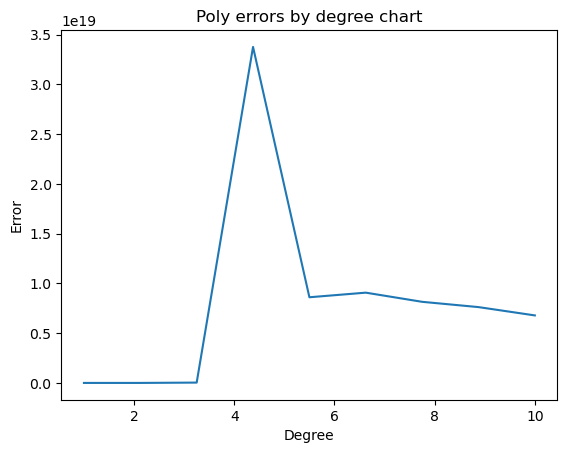

In [29]:
plt.plot(np.linspace(1,10,9),rsme_errors)
plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Poly errors by degree chart')
plt.show()

In [30]:
optimal_poly_degree = 1
# We can run a simple linear regression model and achieve the same results

X_train,X_test,y_train,y_test = split_data(X,y)

scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

simple_linear_model = LinearRegression()
simple_linear_model.fit(scaled_X_train, y_train)
simple_linear_predictions = simple_linear_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test,simple_linear_predictions)
MSE = mean_squared_error(y_test,simple_linear_predictions)
RSME = np.sqrt(MSE)

simple_linear_metrics = {'MAE':[MAE],'MSE':[MSE],'RSME':[RSME]}
simple_linear_metrics = pd.DataFrame(simple_linear_metrics)
simple_linear_metrics

,MAE,MSE,RSME
0,7.236183e+11,1.658267e+24,1.287737e+12


In [31]:
simple_linear_model.coef_

array([ 1.40978629e+12,  9.95860698e+09, -7.89181817e+11, -2.88508506e+11,
       -5.60186085e+10])

In [32]:
# well, the linear models failed to predict in a reasonable scale
# The polynimnal method didn't find a degree that is better (1 is the best) so i didn't put it into the plot since it is the
# statistics are the same as the plain linear model

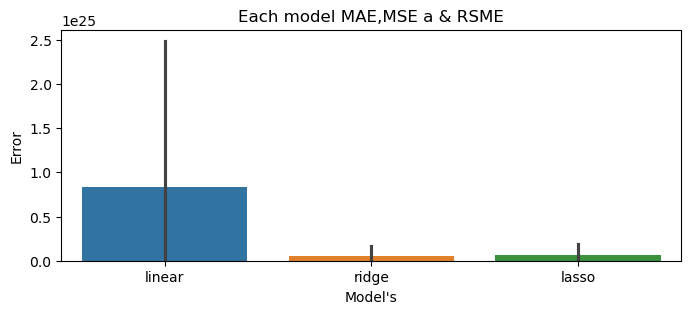

In [33]:
data = {'linear':linear_metrics.loc[0],'ridge':ridge_metrics.loc[0],'lasso':lasso_metrics.loc[0]}
plt.figure(figsize=(8,3))
plt.xlabel("Model's")
plt.ylabel('Error')
plt.title('Each model MAE,MSE a & RSME')
sns.barplot(data=data)

plt.show()

In [34]:
# The ridge statistics is the best

In [35]:
final_model = Ridge(alpha=0.1)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
final_model.fit(scaled_X,y)

Ridge(alpha=0.1)

In [36]:
from joblib import dump,load
dump(scaler,'../models/gdp_scaler.joblib')
dump(final_model,'../models/gdp_model.joblib')

['../models/gdp_model.joblib']

In [37]:
loaded_scaler = load('../models/gdp_scaler.joblib')
loaded_model = load('../models/gdp_model.joblib')